In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs 

In [2]:
url = 'https://www.sulekha.com/placement-consultants/pune'

response = requests.get(url)

In [3]:
response.status_code

200

In [4]:
content = response.content

In [5]:
soup = bs(content)

In [6]:
soup.select('h3.title-xlarge')[0].string

'Vijaya Management Services'

In [7]:
companies = [name.string for name in soup.select('h3.title-xlarge')]

companies

['Vijaya Management Services',
 'Vintage HR Corporate Consultants',
 'Citrus HR Consultants',
 'Career Choice Solution',
 'Digigen Technology Pvt. Ltd.',
 'Gateway HR Consultants Private Limited',
 'Ideal Crew Technology',
 'Inspire People Consultancy',
 'Orbitouch Outsourcing Pvt. Ltd.',
 'Global Talent Pool ']

In [8]:
l1 = soup.select('div.locality')[0].span.string.strip().split()
' '.join(l1)

'Deccan Gymkhana, Pune, 411004'

In [9]:
address = [' '.join(address.span.string.strip().split()) for address in soup.select('div.locality')]

address

['Deccan Gymkhana, Pune, 411004',
 'Moshi, Pimpri Chinchwad, 410105',
 'Andheri East, Mumbai, 400059',
 'Vashi, Mumbai, 400705',
 'Uttam Nagar, Delhi, 110059',
 'Pune R.S., Pune, 412105',
 'Balaji Nagar, Pune, 411043',
 'Ganga Nagar, Bangalore, 560032',
 'Tilak Nagar, Delhi, 110057',
 'Mathikere, Bangalore, 560054']

In [10]:
soup.select('div.ratings-group')[0].b

<b>3.3/5</b>

In [11]:
for rating in soup.select('div.ratings-group'):
    if rating.b is not None:
        print(rating.b.string[:3])

3.3
4.6
5.0
4.7
4.3
5.0
3.0
4.7
5.0
5.0
4.0


In [12]:
rating = [rating.b.string[:3] for rating in soup.select('div.ratings-group') if rating.b is not None ]

rating = [float(num) for num in rating]

rating.pop()

rating

[3.3, 4.6, 5.0, 4.7, 4.3, 5.0, 3.0, 4.7, 5.0, 5.0]

In [13]:
total_ratings = [rating.span.string[8:][:-7] for rating in soup.select('div.ratings-group') if rating.b is not None]

total_ratings.remove(total_ratings[-1])

total_ratings = [int(num) for num in total_ratings]

total_ratings

[23, 5, 3, 52, 6, 19, 1, 11, 31, 3]

In [14]:
rating

[3.3, 4.6, 5.0, 4.7, 4.3, 5.0, 3.0, 4.7, 5.0, 5.0]

In [15]:
len(rating)

10

In [16]:
df = pd.DataFrame({'companies': companies, 'address': address, 'rating':rating,'total_ratings':total_ratings })

df

,companies,address,rating,total_ratings
0,Vijaya Management Services,"Deccan Gymkhana, Pune, 411004",3.3,23
1,Vintage HR Corporate Consultants,"Moshi, Pimpri Chinchwad, 410105",4.6,5
2,Citrus HR Consultants,"Andheri East, Mumbai, 400059",5.0,3
3,Career Choice Solution,"Vashi, Mumbai, 400705",4.7,52
4,Digigen Technology Pvt. Ltd.,"Uttam Nagar, Delhi, 110059",4.3,6
5,Gateway HR Consultants Private Limited,"Pune R.S., Pune, 412105",5.0,19
6,Ideal Crew Technology,"Balaji Nagar, Pune, 411043",3.0,1
7,Inspire People Consultancy,"Ganga Nagar, Bangalore, 560032",4.7,11
8,Orbitouch Outsourcing Pvt. Ltd.,"Tilak Nagar, Delhi, 110057",5.0,31
9,Global Talent Pool,"Mathikere, Bangalore, 560054",5.0,3


In [17]:
df['total_ratings'] = df['rating']* df['total_ratings']

In [18]:
df

,companies,address,rating,total_ratings
0,Vijaya Management Services,"Deccan Gymkhana, Pune, 411004",3.3,75.9
1,Vintage HR Corporate Consultants,"Moshi, Pimpri Chinchwad, 410105",4.6,23.0
2,Citrus HR Consultants,"Andheri East, Mumbai, 400059",5.0,15.0
3,Career Choice Solution,"Vashi, Mumbai, 400705",4.7,244.4
4,Digigen Technology Pvt. Ltd.,"Uttam Nagar, Delhi, 110059",4.3,25.8
5,Gateway HR Consultants Private Limited,"Pune R.S., Pune, 412105",5.0,95.0
6,Ideal Crew Technology,"Balaji Nagar, Pune, 411043",3.0,3.0
7,Inspire People Consultancy,"Ganga Nagar, Bangalore, 560032",4.7,51.7
8,Orbitouch Outsourcing Pvt. Ltd.,"Tilak Nagar, Delhi, 110057",5.0,155.0
9,Global Talent Pool,"Mathikere, Bangalore, 560054",5.0,15.0


In [19]:
df.to_csv('consultancy_services.csv', index=False)

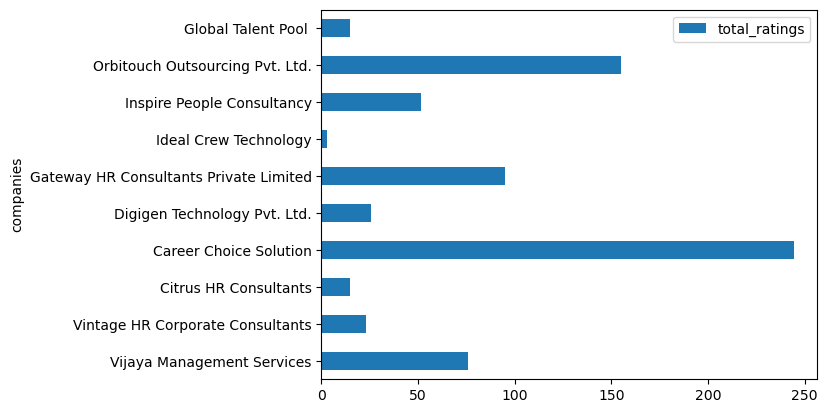

In [20]:
df.plot(kind = 'barh',x = 'companies', y = 'total_ratings');